In [76]:
# For loading data and data manipulation
import pandas as pd
# For mathematical computations
import numpy as np
# For model building
from sklearn.cluster import KMeans
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import mysql.connector as connection
warnings.filterwarnings('ignore')

# Load the data through MySQL

In [77]:
%%time
try:
    mydb = connection.connect(host="localhost", database = 'movie_series_rec',user="root", passwd="root",use_pure=True)
    movie_series_query = "select * from movie_series_data;"
    movie_series_df = pd.read_sql(movie_series_query, mydb)
    mv_srs_user_query = "select * from movie_series_userid;"
    mv_srs_user_df = pd.read_sql(mv_srs_user_query, mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

CPU times: user 18.1 s, sys: 4.61 s, total: 22.7 s
Wall time: 24.7 s


In [78]:
%%time
movies_df = movie_series_df.loc[movie_series_df['TYPE'] == "movie"]
series_df = movie_series_df.loc[movie_series_df['TYPE'] == "series"]

CPU times: user 31.7 ms, sys: 18.1 ms, total: 49.8 ms
Wall time: 72.4 ms


In [79]:
# Top observation in movie dataset
movies_df.head()

,TITLE_ID,TITLE,IMDB_SCORE,TYPE,GENRE,POSTER,ACTORS,RATED,LANGUAGES,YEAR
0,1,Toy Story,8.3,movie,"Animation, Adventure, Comedy",https://m.media-amazon.com/images/M/MV5BMDU2ZW...,"Tom Hanks, Tim Allen, Don Rickles",G,English,1995
1,2,Jumanji,7.0,movie,"Adventure, Comedy, Family",https://m.media-amazon.com/images/M/MV5BZTk2Zm...,"Robin Williams, Kirsten Dunst, Bonnie Hunt",PG,"English, French",1995
2,3,Grumpier Old Men,6.6,movie,"Comedy, Romance",https://m.media-amazon.com/images/M/MV5BMjQxM2...,"Walter Matthau, Jack Lemmon, Ann-Margret",PG-13,"English, Italian, German",1995
3,4,Waiting to Exhale,5.9,movie,"Comedy, Drama, Romance",https://m.media-amazon.com/images/M/MV5BYzcyMD...,"Whitney Houston, Angela Bassett, Loretta Devine",R,English,1995
4,5,Father of the Bride Part II,6.0,movie,"Comedy, Family, Romance",https://m.media-amazon.com/images/M/MV5BOTEyNz...,"Steve Martin, Diane Keaton, Martin Short",PG,English,1995


In [80]:
# Top observation in movie_uid dataset
mv_srs_user_df.head() 

,USER_ID,TITLE_ID
0,1,307
1,1,481
2,1,1091
3,1,1257
4,1,1449


Common column in both the movie and movie_uid is ID which can be used for merging both the dataset

In [81]:
# Dimension of the datasets related to movies
print("Dimension of the movie dataset \n|", movies_df.shape)

Dimension of the movie dataset 
| (48423, 10)


Series

In [82]:
# Top observation in series dataset
series_df.head()

,TITLE_ID,TITLE,IMDB_SCORE,TYPE,GENRE,POSTER,ACTORS,RATED,LANGUAGES,YEAR
48423,193889,Unforgettable,6.7,series,"Crime, Drama, Mystery",https://m.media-amazon.com/images/M/MV5BMTYwMz...,"Poppy Montgomery, Dylan Walsh, James Hiroyuki ...",TV-14,None,2011
48424,193890,Pie in the Sky,7.6,series,"Comedy, Crime, Drama",https://m.media-amazon.com/images/M/MV5BMTYzMD...,"Richard Griffiths, Maggie Steed, Malcolm Sinclair",Not Rated,English,1994
48425,193891,Reckless,7.0,series,"Crime, Drama",https://m.media-amazon.com/images/M/MV5BYjk0Zj...,"Kim Wayans, Michael Gladis, Gregory Harrison",None,English,2014
48426,193892,Hunted,7.3,series,"Action, Drama",https://m.media-amazon.com/images/M/MV5BMGFiMG...,"Melissa George, Adam Rayner, Patrick Malahide",TV-MA,"English, Arabic",2012
48427,193893,Little Princess,5.6,series,"Animation, Family",https://m.media-amazon.com/images/M/MV5BMjI5Nj...,"Jane Horrocks, Colin McFarlane, Julian Clary",TV-Y7,English,2006


In [83]:
# Dimension of the datasets
print("Dimension of the series dataset \n|", series_df.shape)

Dimension of the series dataset 
| (24791, 10)


In [84]:
movie_series_df.shape

(73214, 10)

In [85]:
#Removing Trailing Spaces from Movie/Series Titles
movie_series_df['TITLE'] = movie_series_df['TITLE'].str.strip()

In [86]:
# Check if the missing values has been removed
movie_series_df.isna().sum()

TITLE_ID          0
TITLE             0
IMDB_SCORE        0
TYPE              0
GENRE           262
POSTER         1390
ACTORS         1021
RATED         26540
LANGUAGES       925
YEAR              0
dtype: int64

In [87]:
movie_series_df[['RATED']] = movie_series_df[['RATED']].fillna(value='Unrated')
movie_series_df[['POSTER']] = movie_series_df[['POSTER']].fillna(value='Unavailable')
movie_series_df[['ACTORS']] = movie_series_df[['ACTORS']].fillna(value='Unknown')
movie_series_df.isna().sum()

TITLE_ID        0
TITLE           0
IMDB_SCORE      0
TYPE            0
GENRE         262
POSTER          0
ACTORS          0
RATED           0
LANGUAGES     925
YEAR            0
dtype: int64

In [88]:
# Delete missing values
movie_series_df.dropna(inplace= True)
movie_series_df.isna().sum()

TITLE_ID      0
TITLE         0
IMDB_SCORE    0
TYPE          0
GENRE         0
POSTER        0
ACTORS        0
RATED         0
LANGUAGES     0
YEAR          0
dtype: int64

In [89]:
# Duplicated values
print('Number of Duplicated values: \n{}'.format(movie_series_df.duplicated().sum()))
print('\nDuplicated values in Percentage: \n{}%'.format((movie_series_df.duplicated().sum()/len(movie_series_df)*100).round(2)))

Number of Duplicated values: 
5775

Duplicated values in Percentage: 
8.01%


In [90]:
# Drop the duplicated values as it is less than 10%
movie_series_df.drop_duplicates(inplace = True)
movie_series_df.shape

(66296, 10)

In [91]:
movie_series_df = movie_series_df.drop_duplicates(subset=['TITLE_ID'], keep=False)
movie_series_df.shape

(63049, 10)

In [92]:
movie_series_df = movie_series_df.drop_duplicates(subset=['TITLE', 'TYPE', 'IMDB_SCORE'], keep=False)
movie_series_df.shape

(63049, 10)

# Standardize RATED Category

In [93]:
# Captalize RATED column 
movie_series_df['RATED'] = movie_series_df['RATED'].str.upper()

In [94]:
# Check for the unique values in Rated column
print(movie_series_df['RATED'].unique())
print("\nNumber of Unique Values =", movie_series_df['RATED'].nunique())

['G' 'PG' 'PG-13' 'R' 'PASSED' 'NOT RATED' 'UNRATED' 'TV-14' 'NC-17'
 'APPROVED' 'TV-MA' 'X' 'TV-PG' 'M/PG' 'GP' 'TV-Y7' 'M' 'TV-G' 'TV-Y7-FV'
 '16' 'OPEN' 'TV-13' 'TV-Y' 'E' 'S' 'AO' 'LIVRE' '15' '13' 'E10+' 'MA-17'
 '12']

Number of Unique Values = 32


In [95]:
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['OPEN', 'UNRATED', 'G', 'TV-G', 'LIVRE', 'E', 'BTL', 'S', 'K-3'], 'G'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['R', 'TV-MA', 'M-PG' 'NC-17', 'AO', 'X', 'O.AL.'], 'R'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['TV-Y7-FV', 'TV-Y7'], 'TV-Y7'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['MA-13', 'TV-13', '13'], 'MA-13'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['M', '15'], 'M'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['MA-17', 'M-PG', '16'], 'MA-17'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['NOT RATED', 'UNRATED', 'Unrated', 'Not Rated'], 'PG'))

In [96]:
print(movie_series_df['RATED'].unique())
print()
print('Total Unique Ratings =', len(movie_series_df['RATED'].unique()))

['G' 'PG' 'PG-13' 'R' 'PASSED' 'TV-14' 'NC-17' 'APPROVED' 'TV-PG' 'M/PG'
 'GP' 'TV-Y7' 'M' 'MA-17' 'MA-13' 'TV-Y' 'E10+' '12']

Total Unique Ratings = 18


In [97]:
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['M', 'MA-13', 'UNAVAILABLE'], 'PG-13'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['NC-17', 'MA-17'], 'R'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['GP', 'E10+', '12','M/PG', 'TV-PG', 'TV-14'], 'PG'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['TV-Y7','TV-Y'], 'G'))
movie_series_df[['RATED']] = movie_series_df[['RATED']].replace(dict.fromkeys(['APPROVED','PASSED'], 'G'))
print(movie_series_df['RATED'].unique())
print()
print('Total Unique Ratings =', len(movie_series_df['RATED'].unique()))

['G' 'PG' 'PG-13' 'R']

Total Unique Ratings = 4


# EDA

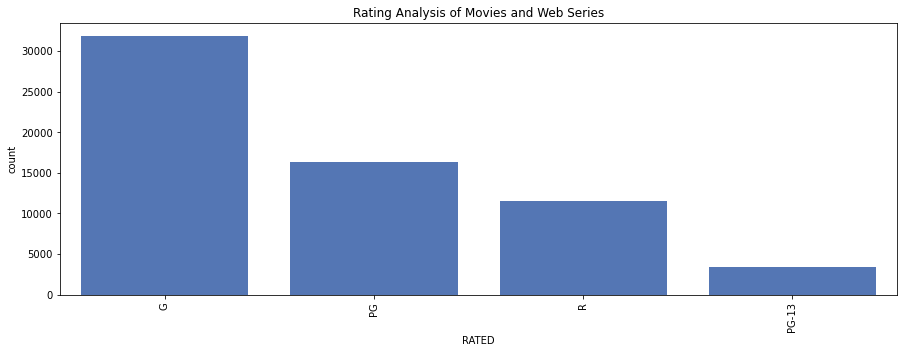

In [98]:
# Analysis of Rated Movies
plt.figure(figsize=(15,5))
sns.countplot(x="RATED", data = movie_series_df, color ="#4472C4", order = movie_series_df['RATED'].value_counts().index[0:19])
plt.title('Rating Analysis of Movies and Web Series')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Year Wise Analysis'}, xlabel='count', ylabel='YEAR'>

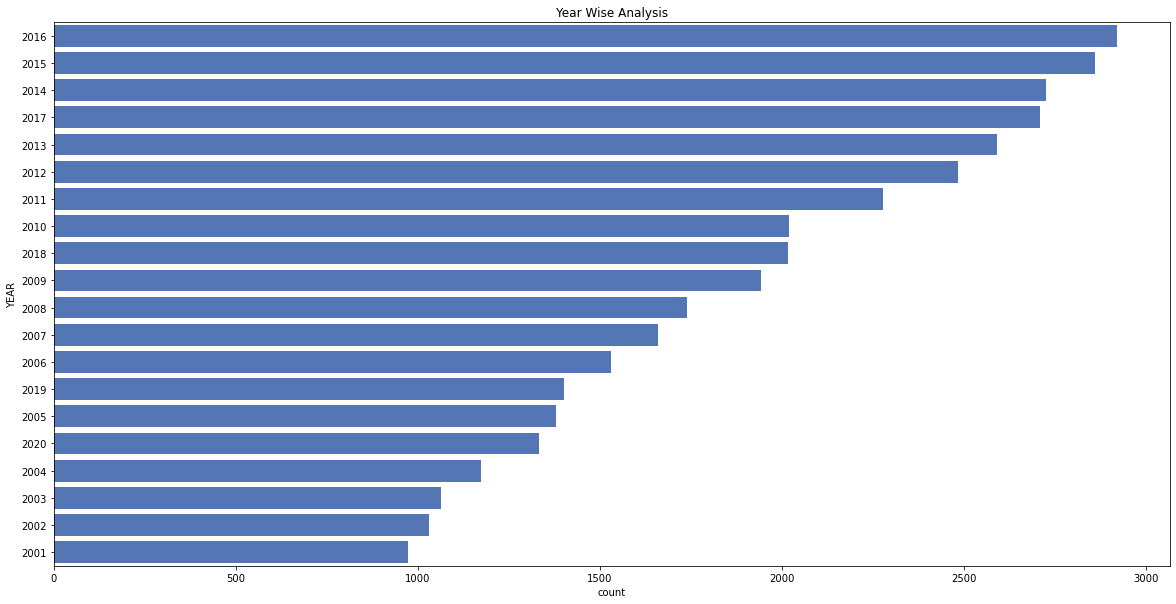

In [99]:
# Year Wise Analysis
plt.figure(figsize=(20,10))
plt.title('Year Wise Analysis')
sns.countplot(y ="YEAR", data = movie_series_df, color ="#4472C4", order = movie_series_df['YEAR'].value_counts().index[0:20])

<AxesSubplot:title={'center':'Genre Wise Analysis'}, xlabel='count', ylabel='GENRE'>

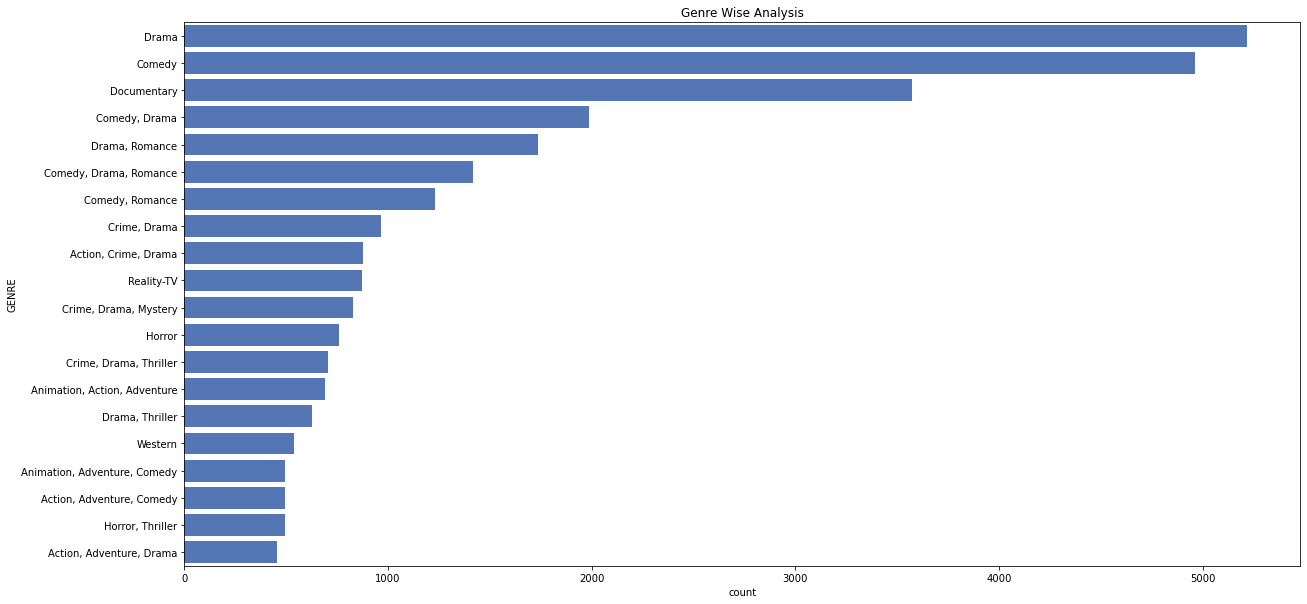

In [100]:
# Genre Wise Analysis
plt.figure(figsize=(20,10))
plt.title('Genre Wise Analysis')
sns.countplot(y ="GENRE", data = movie_series_df, color ="#4472C4", order = movie_series_df['GENRE'].value_counts().index[0:20])

<AxesSubplot:title={'center':'Language Wise Analysis'}, xlabel='count', ylabel='LANGUAGES'>

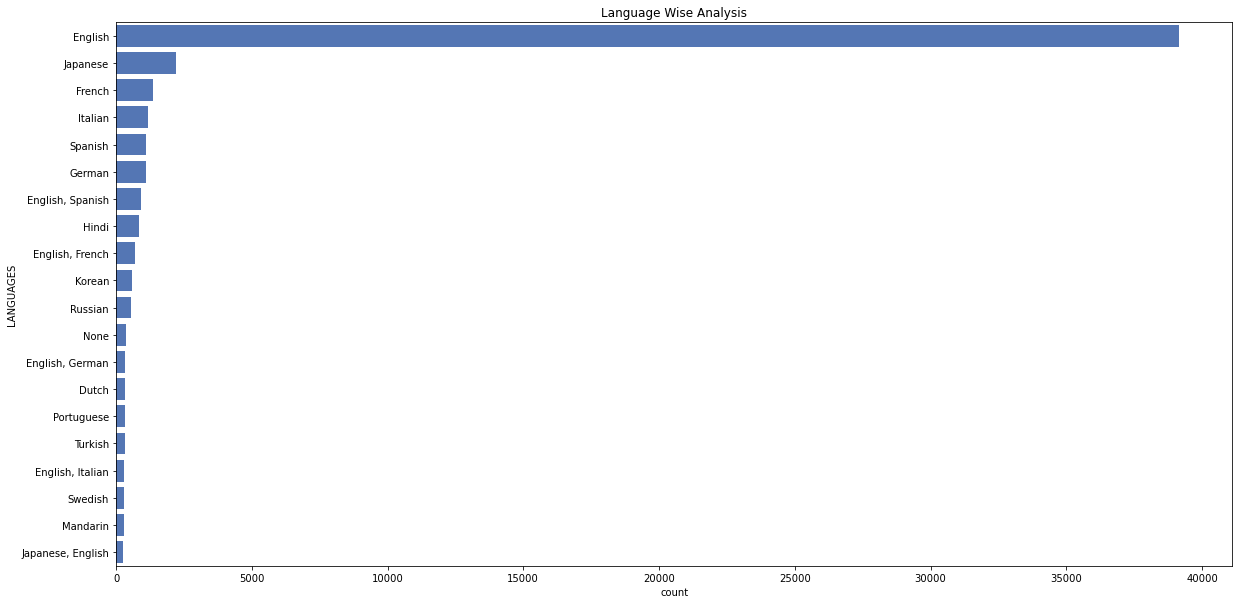

In [101]:
# Language Wise Analysis
plt.figure(figsize=(20,10))
plt.title('Language Wise Analysis')
sns.countplot(y ="LANGUAGES", data = movie_series_df, color ="#4472C4", order = movie_series_df['LANGUAGES'].value_counts().index[0:20])

In [102]:
mv_srs_user_df

,USER_ID,TITLE_ID
0,1,307
1,1,481
2,1,1091
3,1,1257
4,1,1449
...,...,...
1669779,3627,199056
1669780,3627,199210
1669781,3627,194882
1669782,3627,217207


In [103]:
%%time
# Merge movie-series and movie-series-userid to get User ID for the movie-series dataset
mv_srs_user_df = pd.merge(mv_srs_user_df, movie_series_df)
mv_srs_user_df.shape

CPU times: user 292 ms, sys: 71.4 ms, total: 363 ms
Wall time: 380 ms


(1350397, 11)

# Dataset Sampling 

In [104]:
mv_srs_user_sample_df_1 = mv_srs_user_df.query('1 <= USER_ID <= 100')
mv_srs_user_sample_df_2 = mv_srs_user_df.query('1000 <= USER_ID <= 1100')
mv_srs_user_sample_df_3 = mv_srs_user_df.query('2000 <= USER_ID <= 2100')
mv_srs_user_sample_df_4 = mv_srs_user_df.query('3000 <= USER_ID <= 3100')
mv_srs_user_sample_df_5 = mv_srs_user_df.query('4000 <= USER_ID <= 4100')
mv_srs_user_sample_df_6 = mv_srs_user_df.query('5000 <= USER_ID <= 5100')
mv_srs_user_sample_df_7 = mv_srs_user_df.query('6000 <= USER_ID <= 6100')
mv_srs_user_sample_df_8 = mv_srs_user_df.query('7000 <= USER_ID <= 7100')
mv_srs_user_sample_df_9 = mv_srs_user_df.query('8000 <= USER_ID <= 8100')
mv_srs_user_sample_df_10 = mv_srs_user_df.query('9000 <= USER_ID <= 9100')
mv_srs_user_sample_df_11 = mv_srs_user_df.query('9900 <= USER_ID <= 10000')


# List of your dataframes
pdList = [mv_srs_user_sample_df_1, mv_srs_user_sample_df_2, mv_srs_user_sample_df_3, mv_srs_user_sample_df_4, mv_srs_user_sample_df_5,
          mv_srs_user_sample_df_6, mv_srs_user_sample_df_7, mv_srs_user_sample_df_8, mv_srs_user_sample_df_9, mv_srs_user_sample_df_10,
          mv_srs_user_sample_df_11] 
mv_srs_user_sample_df = pd.concat(pdList)
print(mv_srs_user_sample_df.shape)
mv_srs_user_sample_df.head()

(146631, 11)


,USER_ID,TITLE_ID,TITLE,IMDB_SCORE,TYPE,GENRE,POSTER,ACTORS,RATED,LANGUAGES,YEAR
0,1,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
1,6,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
2,56,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
3,71,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
4,84,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993


In [105]:
mv_srs_user_sample_df

,USER_ID,TITLE_ID,TITLE,IMDB_SCORE,TYPE,GENRE,POSTER,ACTORS,RATED,LANGUAGES,YEAR
0,1,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
1,6,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
2,56,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
3,71,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
4,84,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
...,...,...,...,...,...,...,...,...,...,...,...
1333355,10000,197912,Capitol Critters,7.0,series,"Animation, Comedy, Drama",https://m.media-amazon.com/images/M/MV5BNzNjYT...,"Neil Patrick Harris, Charlie Adler, Patti Deutsch",PG,English,1992
1334051,10000,210380,Sword of the Atom,7.2,series,"Animation, Sci-Fi",https://m.media-amazon.com/images/M/MV5BYjQ2ZD...,"Jason Marsden, David Kaye, Armin Shimerman",G,English,2012
1338040,10000,216842,H3 Podcast,6.9,series,"Comedy, Talk-Show",https://m.media-amazon.com/images/M/MV5BODZhYm...,"Ethan Klein, Hila Klein",PG,English,2016
1338167,10000,195248,Doctor's Orders,6.5,series,"Documentary, Crime",https://m.media-amazon.com/images/M/MV5BOGUzNT...,"Kim Pack, Adal Ray, Damon Tyner",G,English,2021


In [106]:
# Creating EDA Data again for visualizing RATED, YEAR, GENRE, LANGUAGE
mv_srs_user_sample_df_EDA = mv_srs_user_sample_df.drop_duplicates(subset=['TITLE_ID', 'TYPE', 'IMDB_SCORE'])
mv_srs_user_sample_df_EDA

,USER_ID,TITLE_ID,TITLE,IMDB_SCORE,TYPE,GENRE,POSTER,ACTORS,RATED,LANGUAGES,YEAR
0,1,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
332,1,481,Kalifornia,6.7,movie,"Crime, Drama, Thriller",https://m.media-amazon.com/images/M/MV5BNDE2OD...,"Brad Pitt, Juliette Lewis, Kathy Larson",R,English,1993
598,1,1091,Curtis's Charm,6.7,movie,"Comedy, Drama",https://m.media-amazon.com/images/M/MV5BY2MxOD...,"Maurice Dean Wint, Callum Keith Rennie, Rachae...",G,English,1995
825,1,1257,Better Off Dead...,7.1,movie,"Comedy, Romance",https://m.media-amazon.com/images/M/MV5BMzRmMj...,"John Cusack, David Ogden Stiers, Kim Darby",PG,English,1985
1066,1,1449,Waiting for Guffman,7.4,movie,Comedy,https://m.media-amazon.com/images/M/MV5BYWY4OG...,"Christopher Guest, Fred Willard, Catherine O'Hara",R,English,1996
...,...,...,...,...,...,...,...,...,...,...,...
1326548,9988,195661,Life with Elizabeth,7.3,series,Comedy,https://m.media-amazon.com/images/M/MV5BMWUwYz...,"Betty White, Del Moore, Jack Narz",G,English,1952
1326596,9989,206848,Livet i Fagervik,7.0,series,Drama,https://m.media-amazon.com/images/M/MV5BOTk5ZT...,"Henrik Johansson, Maria Sid, Lars Lind",G,Swedish,2008
1327843,9999,207549,Atashinchi no danshi,7.1,series,Comedy,https://m.media-amazon.com/images/M/MV5BZjUwMz...,"Maki Horikita, Jun Kaname, Yoshinori Okada",G,Japanese,2009
1328997,10000,202851,Waltz,7.9,series,Drama,https://m.media-amazon.com/images/M/MV5BMTQwMD...,"Aart Staartjes, Olga Louzgina, Theo Maassen",G,Dutch,2006


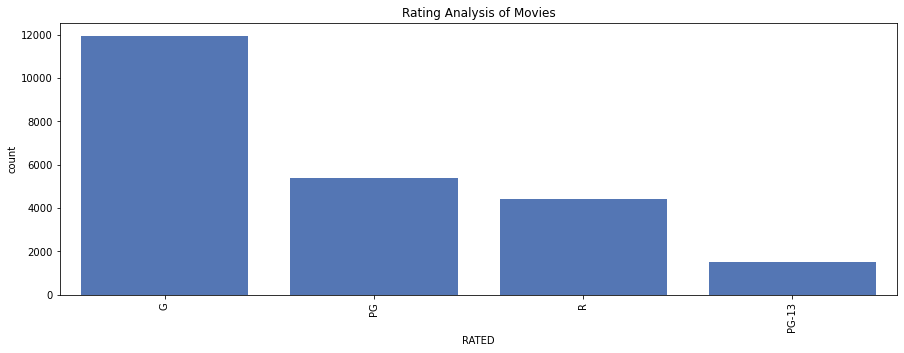

In [107]:
# Analysis of Rated Movies and Web Series after sampling
plt.figure(figsize=(15,5))
sns.countplot(x="RATED", data = mv_srs_user_sample_df_EDA, color ="#4472C4", order = mv_srs_user_sample_df_EDA['RATED'].value_counts().index[0:19])
plt.title('Rating Analysis of Movies and Web Series')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Year Wise Analysis'}, xlabel='count', ylabel='YEAR'>

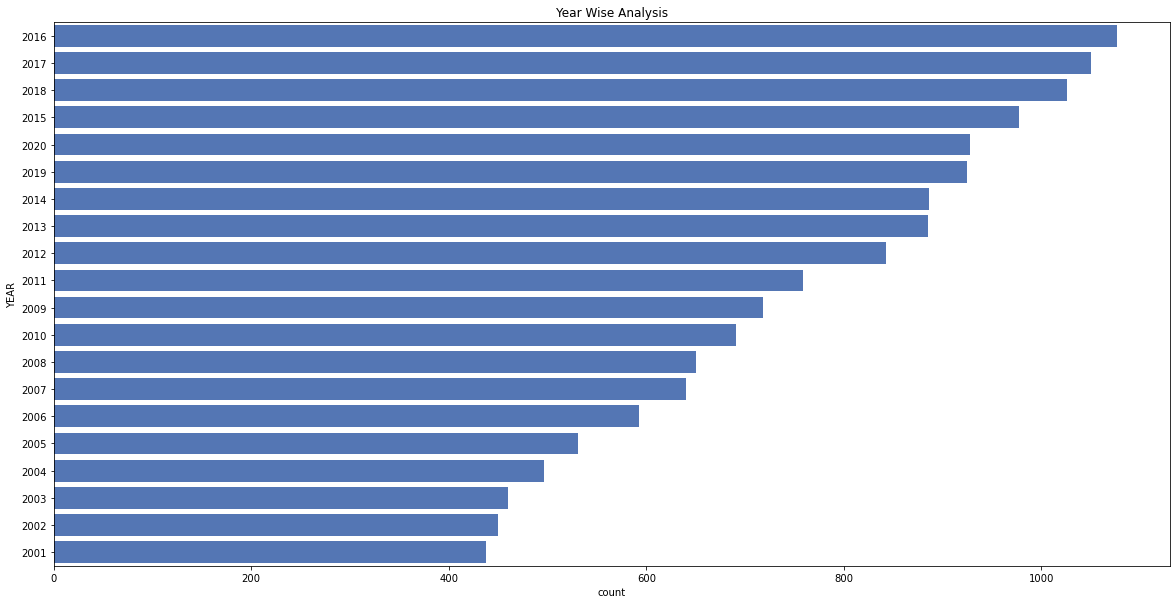

In [108]:
# Year Wise Analysis after sampling
plt.figure(figsize=(20,10))
plt.title('Year Wise Analysis')
sns.countplot(y ="YEAR", data = mv_srs_user_sample_df_EDA, color ="#4472C4", order = mv_srs_user_sample_df_EDA['YEAR'].value_counts().index[0:20])

<AxesSubplot:title={'center':'Genre Wise Analysis'}, xlabel='count', ylabel='GENRE'>

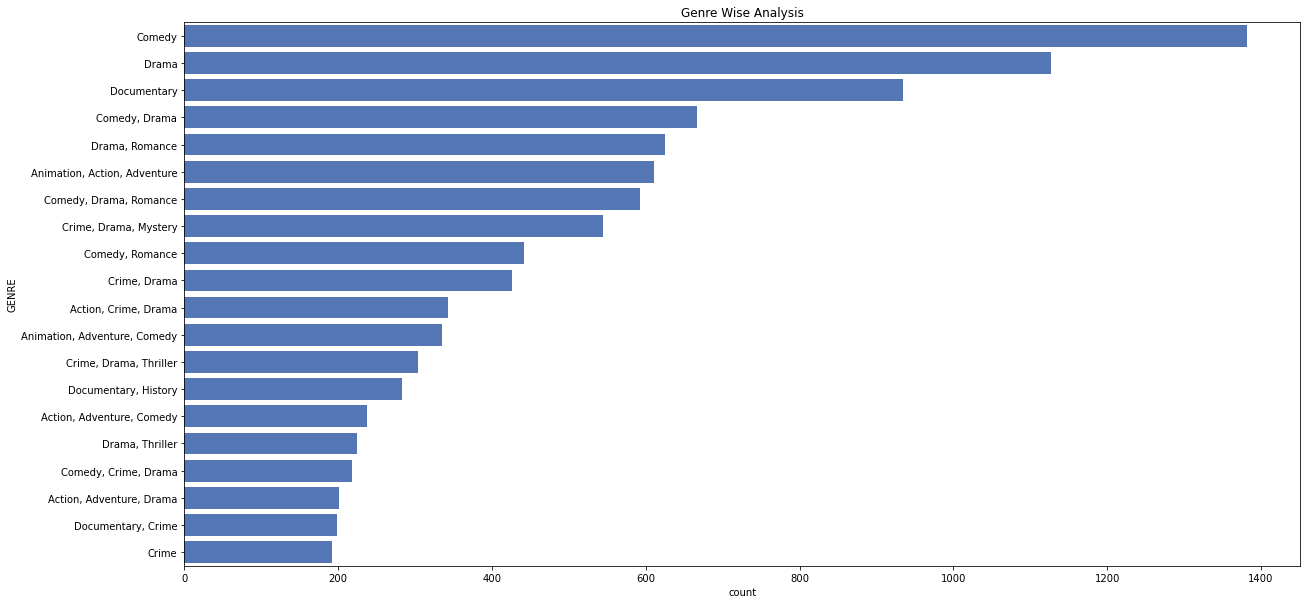

In [109]:
# Genre Wise Analysis after sampling
plt.figure(figsize=(20,10))
plt.title('Genre Wise Analysis')
sns.countplot(y ="GENRE", data = mv_srs_user_sample_df_EDA, color ="#4472C4", order = mv_srs_user_sample_df_EDA['GENRE'].value_counts().index[0:20])

<AxesSubplot:title={'center':'Language Wise Analysis'}, xlabel='count', ylabel='LANGUAGES'>

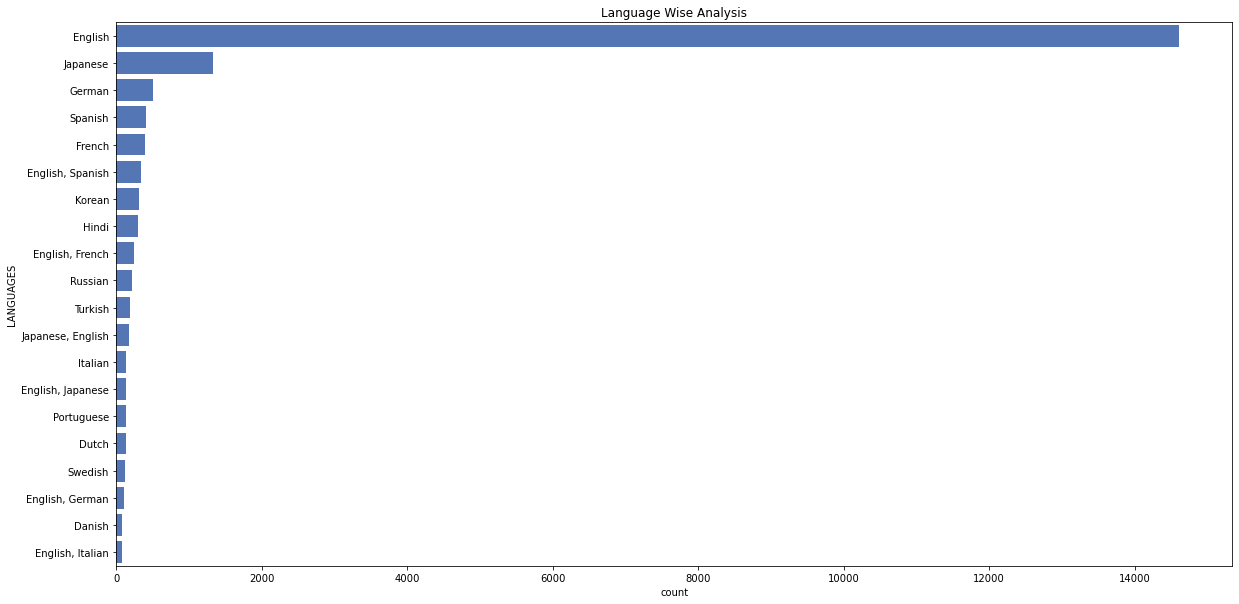

In [110]:
# Language Wise Analysis after sampling
plt.figure(figsize=(20,10))
plt.title('Language Wise Analysis')
sns.countplot(y ="LANGUAGES", data = mv_srs_user_sample_df_EDA, color ="#4472C4", order = mv_srs_user_sample_df_EDA['LANGUAGES'].value_counts().index[0:20])

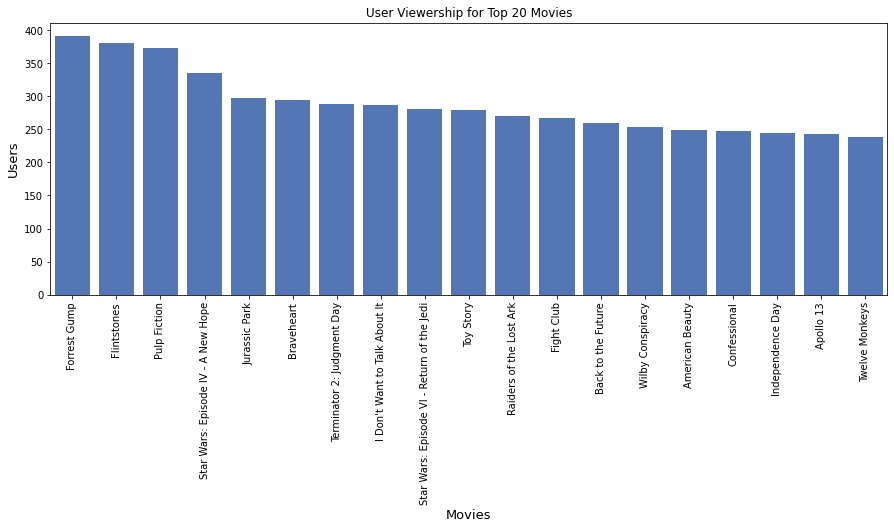

In [111]:
# Analysis of User Viewership for Top 20 Movies after sampling
plt.figure(figsize=(15,5))
sns.countplot(x="TITLE", data = mv_srs_user_sample_df, color ="#4472C4", order = mv_srs_user_sample_df.loc[mv_srs_user_sample_df['TYPE'] == 'movie']['TITLE'].value_counts().index[0:19])
plt.title('User Viewership for Top 20 Movies')
plt.xticks(rotation=90)
plt.ylabel('Users', fontsize=13)
plt.xlabel('Movies', fontsize=13)
plt.show()

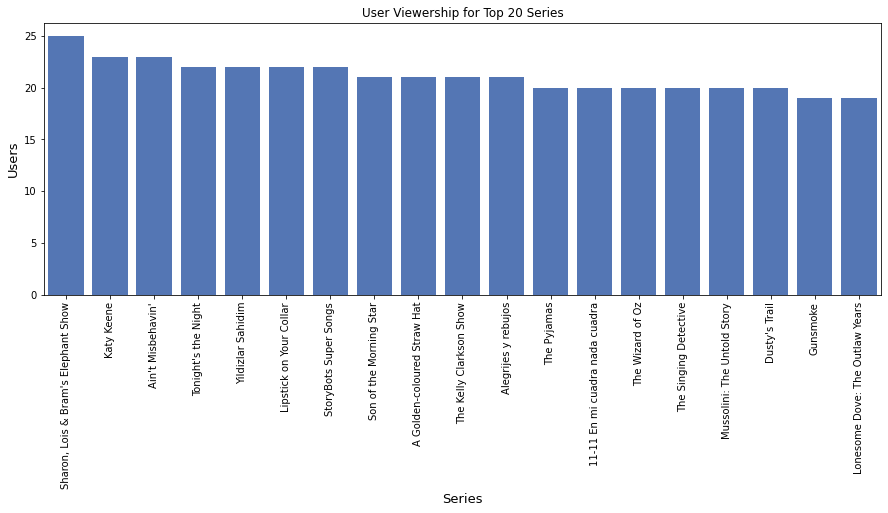

In [112]:
# Analysis of User Viewership for Top 20 Series after sampling
plt.figure(figsize=(15,5))
sns.countplot(x="TITLE", data = mv_srs_user_sample_df, color ="#4472C4", order = mv_srs_user_sample_df.loc[mv_srs_user_sample_df['TYPE'] == 'series']['TITLE'].value_counts().index[0:19])
plt.title('User Viewership for Top 20 Series')
plt.xticks(rotation=90)
plt.ylabel('Users', fontsize=13)
plt.xlabel('Series', fontsize=13)
plt.show()

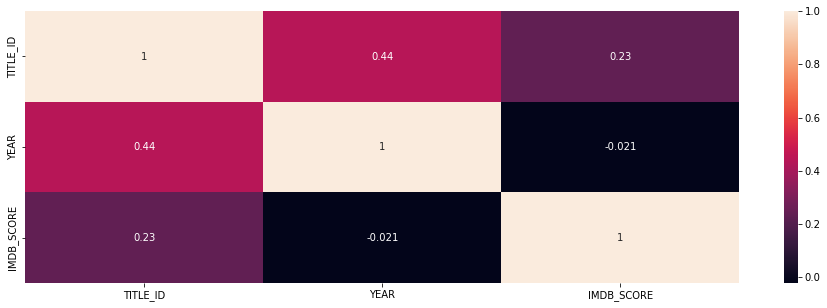

CPU times: user 206 ms, sys: 18.8 ms, total: 224 ms
Wall time: 225 ms


,USER_ID,TITLE_ID,TITLE,IMDB_SCORE,TYPE,GENRE,POSTER,ACTORS,RATED,LANGUAGES,YEAR
0,1,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
1,6,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
2,56,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
3,71,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
4,84,307,Three Colors: Blue,7.9,movie,"Drama, Music, Mystery",https://m.media-amazon.com/images/M/MV5BZWU5NW...,"Juliette Binoche, Zbigniew Zamachowski, Julie ...",R,French,1993
...,...,...,...,...,...,...,...,...,...,...,...
1333355,10000,197912,Capitol Critters,7.0,series,"Animation, Comedy, Drama",https://m.media-amazon.com/images/M/MV5BNzNjYT...,"Neil Patrick Harris, Charlie Adler, Patti Deutsch",PG,English,1992
1334051,10000,210380,Sword of the Atom,7.2,series,"Animation, Sci-Fi",https://m.media-amazon.com/images/M/MV5BYjQ2ZD...,"Jason Marsden, David Kaye, Armin Shimerman",G,English,2012
1338040,10000,216842,H3 Podcast,6.9,series,"Comedy, Talk-Show",https://m.media-amazon.com/images/M/MV5BODZhYm...,"Ethan Klein, Hila Klein",PG,English,2016
1338167,10000,195248,Doctor's Orders,6.5,series,"Documentary, Crime",https://m.media-amazon.com/images/M/MV5BOGUzNT...,"Kim Pack, Adal Ray, Damon Tyner",G,English,2021


In [113]:
%%time
mv_srs_user_corr_df = mv_srs_user_sample_df.drop(['TITLE', 'USER_ID'], axis = 1)
mv_srs_user_corr_df = mv_srs_user_corr_df.drop_duplicates(subset=['TITLE_ID'], keep=False)
plt.figure(figsize = (16,5))
ax = sns.heatmap(mv_srs_user_corr_df[['TITLE_ID', 'YEAR', 'IMDB_SCORE']].corr(), annot=True)
plt.show()
mv_srs_user_sample_df

In [114]:
# Get the basic info about the data (range, datatypes of each attribute)
mv_srs_user_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146631 entries, 0 to 1338178
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   USER_ID     146631 non-null  int64  
 1   TITLE_ID    146631 non-null  int64  
 2   TITLE       146631 non-null  object 
 3   IMDB_SCORE  146631 non-null  float64
 4   TYPE        146631 non-null  object 
 5   GENRE       146631 non-null  object 
 6   POSTER      146631 non-null  object 
 7   ACTORS      146631 non-null  object 
 8   RATED       146631 non-null  object 
 9   LANGUAGES   146631 non-null  object 
 10  YEAR        146631 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 13.4+ MB


In [115]:
# Statistical summary for the numerical attributes
mv_srs_user_sample_df.describe().round(1)

,USER_ID,TITLE_ID,IMDB_SCORE,YEAR
count,146631.0,146631.0,146631.0,146631.0
mean,4938.1,98536.2,7.1,1998.5
std,3233.8,95433.2,1.1,17.0
min,1.0,1.0,1.0,1894.0
25%,2039.0,2359.0,6.5,1992.0
50%,5027.0,67734.0,7.2,2000.0
75%,8035.0,203121.5,7.8,2011.0
max,10000.0,219605.0,10.0,2022.0


In [116]:
# Statistical summary for the categorical attributes
mv_srs_user_sample_df[['TITLE','TYPE','GENRE', 'RATED','LANGUAGES']].describe(include='object').T

,count,unique,top,freq
TITLE,146631,22987,Forrest Gump,392
TYPE,146631,2,movie,86052
GENRE,146631,1175,Drama,4633
RATED,146631,4,G,50976
LANGUAGES,146631,1374,English,97329


In [117]:
movies_df.columns

Index(['TITLE_ID', 'TITLE', 'IMDB_SCORE', 'TYPE', 'GENRE', 'POSTER', 'ACTORS',
       'RATED', 'LANGUAGES', 'YEAR'],
      dtype='object')

In [118]:
mv_srs_user_sample_df.columns

Index(['USER_ID', 'TITLE_ID', 'TITLE', 'IMDB_SCORE', 'TYPE', 'GENRE', 'POSTER',
       'ACTORS', 'RATED', 'LANGUAGES', 'YEAR'],
      dtype='object')

In [119]:
mv_srs_user_sample_df = mv_srs_user_sample_df.drop(['POSTER', 'ACTORS'], axis = 1)

In [120]:
mv_srs_user_sample_df.describe(include = 'object').T

,count,unique,top,freq
TITLE,146631,22987,Forrest Gump,392
TYPE,146631,2,movie,86052
GENRE,146631,1175,Drama,4633
RATED,146631,4,G,50976
LANGUAGES,146631,1374,English,97329


In [121]:
mv_srs_user_sample_df.shape

(146631, 9)

# Model Building

**Creating Viewership Rules**

In [122]:
%%time
viewer_matrix = mv_srs_user_sample_df.pivot_table(index=['USER_ID'], columns=['TITLE_ID'], values='IMDB_SCORE').fillna(0)
viewer_matrix.head(15)

CPU times: user 833 ms, sys: 718 ms, total: 1.55 s
Wall time: 5.91 s


TITLE_ID,1,2,3,4,5,8,10,11,12,13,...,219593,219594,219595,219596,219597,219598,219599,219601,219604,219605
USER_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.3,7.0,0.0,0.0,6.0,0.0,7.2,6.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.6,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,7.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,6.6,0.0,6.0,0.0,0.0,0.0,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
viewer_matrix = viewer_matrix.astype('int64')

In [124]:
%%time
def encode_ratings(x):
    if x <= 0:
        return False
    if x >= 1:
        return True

viewer_matrix = viewer_matrix.applymap(encode_ratings)

CPU times: user 11.2 s, sys: 536 ms, total: 11.8 s
Wall time: 13.9 s


In [125]:
viewer_matrix.head()

TITLE_ID,1,2,3,4,5,8,10,11,12,13,...,219593,219594,219595,219596,219597,219598,219599,219601,219604,219605
USER_ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,True,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Running Apriori**

In [126]:
%%time
from mlxtend.frequent_patterns import apriori

frequent_movies_series_set = apriori(viewer_matrix, min_support=0.06, use_colnames=True)

CPU times: user 13.1 s, sys: 27.8 s, total: 40.9 s
Wall time: 1min 10s


In [127]:
frequent_movies_series_set.head(20)

,support,itemsets
0,0.253406,(1)
1,0.118983,(2)
2,0.131698,(10)
3,0.072661,(11)
4,0.069028,(16)
5,0.099909,(19)
6,0.094460,(21)
7,0.090827,(25)
8,0.216167,(32)
9,0.131698,(34)


**Generating Association Rules**

In [128]:
%%time
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_movies_series_set,metric="lift", min_threshold=2)

CPU times: user 11.2 s, sys: 2.58 s, total: 13.7 s
Wall time: 19.5 s


In [129]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(2),0.253406,0.118983,0.080836,0.318996,2.681031,0.050685,1.293704
1,(2),(1),0.118983,0.253406,0.080836,0.679389,2.681031,0.050685,2.328662
2,(32),(1),0.216167,0.253406,0.114441,0.529412,2.089184,0.059663,1.586512
3,(1),(32),0.253406,0.216167,0.114441,0.451613,2.089184,0.059663,1.429342
4,(1),(34),0.253406,0.131698,0.084469,0.333333,2.531034,0.051095,1.302452
5,(34),(1),0.131698,0.253406,0.084469,0.641379,2.531034,0.051095,2.081849
6,(1),(62),0.253406,0.086285,0.060854,0.240143,2.783135,0.038989,1.202483
7,(62),(1),0.086285,0.253406,0.060854,0.705263,2.783135,0.038989,2.533087
8,(1),(260),0.253406,0.304269,0.158038,0.623656,2.049687,0.080935,1.848657
9,(260),(1),0.304269,0.253406,0.158038,0.519403,2.049687,0.080935,1.553472


# Generating Recommendations

In [130]:
def recommend_by_title(title):
  movie_series_temp_df = movie_series_df.loc[(movie_series_df['TITLE'] == title)]
  movie_series_temp_df = movie_series_temp_df.reset_index();
  movie_series_temp_df.TITLE_ID[0]
  print(movie_series_temp_df.GENRE)
  df_res = rules[rules["antecedents"].apply(lambda x: str(movie_series_temp_df.TITLE_ID[0]) in str(x))].sort_values(ascending=False,by='lift')
  df_res
  df_res = df_res[df_res['lift'] > 2]
  movies = df_res['consequents'].values

  movie_list = []
  for movie in movies:
      for title in movie:
          if title not in movie_list:
              movie_list.append(title)
  listTitleID = movie_list[0:50]
  d = pd.DataFrame()

  for x in listTitleID:
      temp_df = movie_series_df.loc[movie_series_df['TITLE_ID'] == x]
      temp = pd.DataFrame(
          {   
             
              'TITLE': temp_df.TITLE,
              'IMDB_SCORE': temp_df.IMDB_SCORE,
              'TYPE': temp_df.TYPE,
              'RATED': temp_df.RATED,
              'GENRE': temp_df.GENRE,
              'YEAR': temp_df.YEAR,
              'LANGUAGES': temp_df.LANGUAGES,
              'POSTER': temp_df.POSTER
          }
      )

      d = pd.concat([d, temp])
  d = d.reset_index(drop = True)
  return d

# Input Movie or Web-Series Name to generate Recommendation

In [131]:
%%time
recommend_by_title('Alien')

0    Horror, Sci-Fi
Name: GENRE, dtype: object
CPU times: user 17.9 s, sys: 272 ms, total: 18.2 s
Wall time: 18.9 s


,TITLE,IMDB_SCORE,TYPE,RATED,GENRE,YEAR,LANGUAGES,POSTER
0,Aliens,8.4,movie,R,"Action, Adventure, Sci-Fi",1986,English,https://m.media-amazon.com/images/M/MV5BZGU2OG...
1,Indiana Jones and the Last Crusade,8.2,movie,PG-13,"Action, Adventure",1989,English,https://m.media-amazon.com/images/M/MV5BY2Q0OD...
2,Terminator 2: Judgment Day,8.6,movie,R,"Action, Sci-Fi",1991,English,https://m.media-amazon.com/images/M/MV5BMGU2Nz...
3,Back to the Future,8.5,movie,PG,"Adventure, Comedy, Sci-Fi",1985,English,https://m.media-amazon.com/images/M/MV5BZmU0M2...
4,Star Wars: Episode IV - A New Hope,8.5,movie,G,"Short, Action, Drama, Sci-Fi",2011,English,https://m.media-amazon.com/images/M/MV5BNzVlY2...
5,Raiders of the Lost Ark,8.2,movie,G,"Action, Adventure, Thriller",1989,English,https://m.media-amazon.com/images/M/MV5BYzFkMz...
6,Star Wars: Episode VI - Return of the Jedi,8.3,movie,PG,"Action, Adventure, Fantasy",1983,English,https://m.media-amazon.com/images/M/MV5BOWZlMj...
7,Forrest Gump,8.8,movie,PG-13,"Drama, Romance",1994,English,https://m.media-amazon.com/images/M/MV5BNWIwOD...
8,Newton Boys,6.1,movie,PG-13,"Action, Crime, Drama",1998,English,https://m.media-amazon.com/images/M/MV5BMWZmZD...
9,Independence Day,7.0,movie,PG-13,"Action, Adventure, Sci-Fi",1996,English,https://m.media-amazon.com/images/M/MV5BMGQwND...
